In [11]:
import numpy as np
import os
import pandas as pd
import torch
import albumentations as A
import albumentations.pytorch
import cv2
import sys
import random
import csv
import json
import matplotlib.pyplot as plt

sys.path.append('../')
from visualize import visualize
from utils import *

%matplotlib inline

In [12]:
df = pd.read_csv('../saved/df.csv')
df.label.value_counts()

AS                           6562
Negative                     4468
LS                           3082
ASC-US                       2897
LSIL                         1689
ASC-US with HPV infection    1603
AH                            939
SC                            662
HS                            645
HSIL                          548
C                             527
LSIL with HPV infection       479
Candida                       402
N - Endocervical Cell         304
ASC-H                         263
HSIL with HPV infection       142
HN                            102
Benign atypia                  46
Carcinoma                      18
H                               9
판독불가                            4
ASCUS-SIL                       2
ASC-H with HPV infection        1
N - Endometrial cell            1
Name: label, dtype: int64

In [27]:
df = pd.read_csv('../saved/df.csv')
df.label = df.label.apply(lambda x : CLASS_MAPPER[str(x)])
df = drop_wrong(df)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(23277, 14)


In [14]:
df.label.value_counts()

ASC-US       11057
LSIL          5247
Negative      3647
HSIL          1444
ASC-H         1202
Carcinoma      680
Name: label, dtype: int64

In [15]:
df = df[df['label'] == 'Carcinoma']

In [16]:
df = df.sort_values('area', axis=0, ascending=False)
df.shape

(680, 14)

../../lbp_data/patch_images1/2022.04.08/LBC2432-20210618/LBC2432-20210618_325.png [1626  923  111  102] ['Carcinoma'] [106]
../../lbp_data/patch_images1/2022.04.08/LBC2433-20210727/LBC2433-20210727_1120.png [ 40 245 113  97] ['Carcinoma'] [104]
../../lbp_data/patch_images1/2022.04.08/LBC2418-20210223/LBC2418-20210223_646.png [1748  973  116   92] ['Carcinoma'] [103]
../../lbp_data/patch_images1/2022.04.08/LBC2432-20210618/LBC2432-20210618_1483.png [971 542 114  94] ['Carcinoma'] [103]
../../lbp_data/patch_images1/2022.04.08/LBC2432-20210618/LBC2432-20210618_289.png [1880 1742   82  131] ['Carcinoma'] [103]
../../lbp_data/patch_images1/2022.04.08/LBC2432-20210618/LBC2432-20210618_1247.png [ 36 910 129  82] ['Carcinoma'] [102]
../../lbp_data/patch_images1/2022.04.08/LBC2433-20210727/LBC2433-20210727_852.png [1126  293   99  107] ['Carcinoma'] [102]
../../lbp_data/patch_images1/2022.04.08/LBC2432-20210618/LBC2432-20210618_1313.png [1668   87  109   97] ['Carcinoma'] [102]
../../lbp_data/p

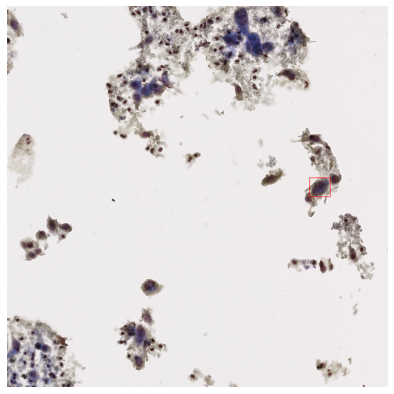

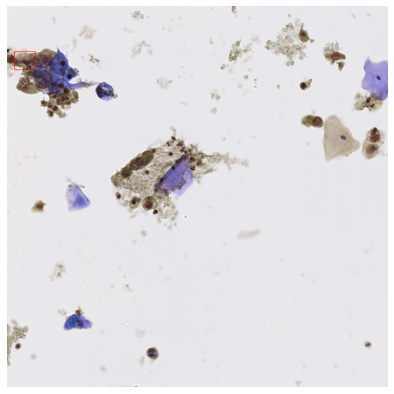

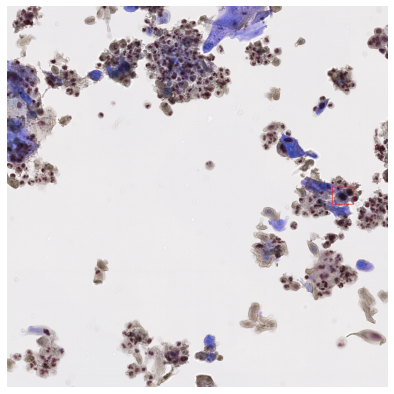

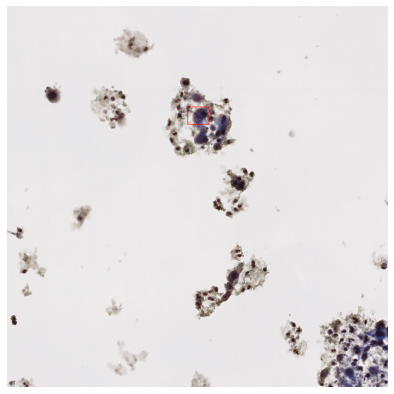

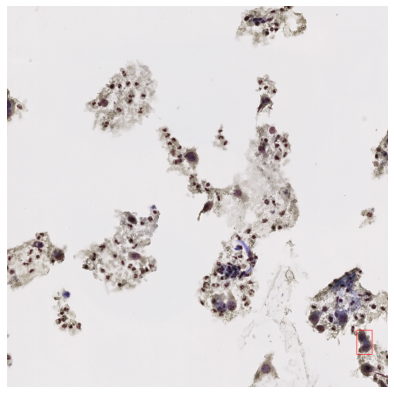

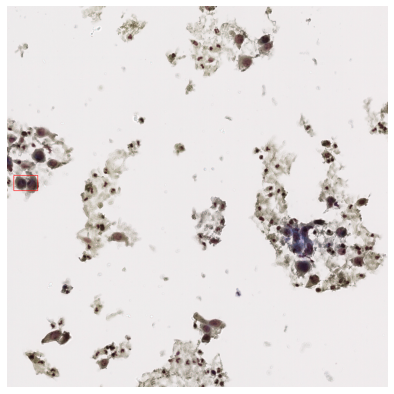

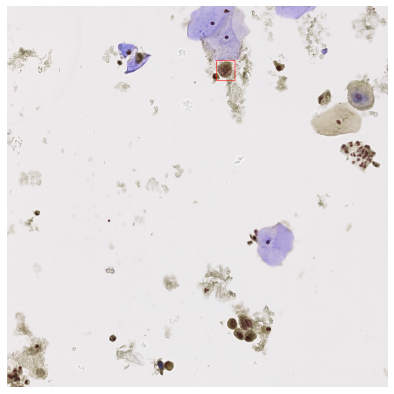

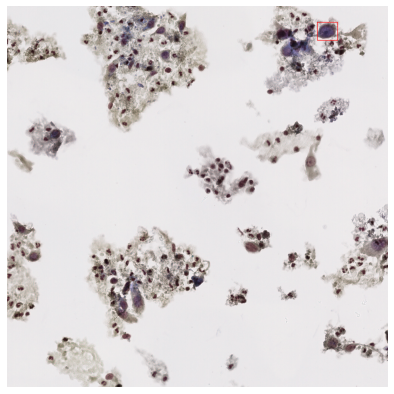

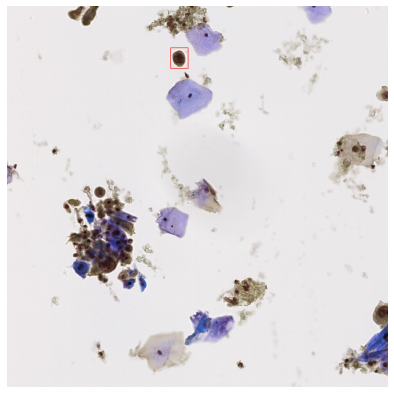

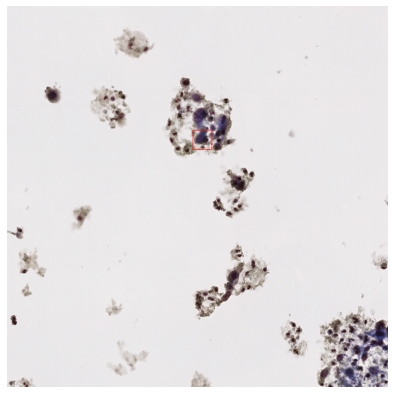

In [23]:
rel_path = '../../lbp_data/'

for NUM in range(600, 610) :
    path = rel_path + df[['file_name']].values[NUM][0]
    boxes = df[['xmin', 'ymin', 'w', 'h']].values[NUM]
    label = df[['label']].values[NUM]
    area = df[['area']].values[NUM]
    print(path, boxes, label, area)
    img = cv2.imread(path)
    visualize(img, [boxes])  